# Week 9 Scratch Paper and Notes

In [ ]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import set_config
set_config(display='diagram')


In [ ]:
## Data Filepaths


# Unsupervised Machine Learning
Used when we don't have a target/y in mind. The machine will learn patterns in the data on its own

Types of Unsupervised learning: 
- Clustering: Attempt to group data into distinct clusters or groups based on common characteristics/patterns. EG: breaking customers into customer segments.

## KMeans Clustering
Popular Clustering algorithm.
- Randomly choose k points to start as our cluster centers
- assign each datapoint to a cluster based on distance
- update the cluster center by finding the mean
- repeat steps until convergence.

video: https://www.youtube.com/watch?v=4b5d3muPQmA


### Python Example

In [ ]:
# from sklearn.cluster import KMeans

In [ ]:
# Laod DataFrame
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [ ]:
# Scale the data for clustering
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

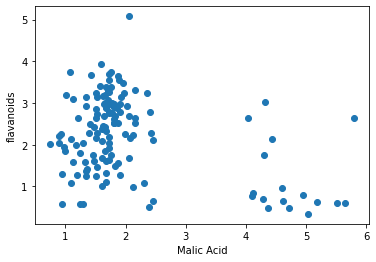

In [ ]:
# Visualize to 'guage' number of clusters... not a perfect science.
plt.scatter(df['malic_acid'], df['flavanoids'])
plt.xlabel('Malic Acid')
plt.ylabel('flavanoids');

# Below graph makes it look like 2(?) clusters might be appropriate

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(n_clusters=2)

In [ ]:
# Array of clusters...
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
# Turn the above array into a column in our original DF
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


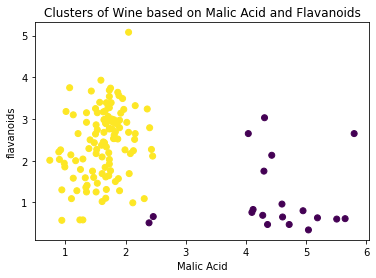

In [ ]:
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('flavanoids')
plt.title('Clusters of Wine based on Malic Acid and Flavanoids');

## Clustering Metrics
Difficult to measure how good a prediction is in an unsupervised model as there is no target by which to compare our predictions. Best practice is to work with SME to confirm the algorithm is providing reasonable results.

Two Metrics of Note:
- Inertia: Measure of tightness of the cluster around the centroid. Determined by calculating the distance between each point and the centroid and summing the squares. Tight clusters are desireable but more =/= better and we must find the point of diminishing returns by finding the elbow point. This elbow will indicate the best K value for our KMean.
- Silhouette Scores: measurement taking into acount how tight and how well-seperated each cluster is. Calculates distance between each data point within the cluster and the points in the next closest cluster... scores range between 1 and -1


### Python Example - Inertia


In [ ]:
# We will be using the above DF so no need to reload, scale, etc. 

In [ ]:
# Create list of inertias
inertias = []

# Loop through k values and store inertia values in the list
for k in range(2,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

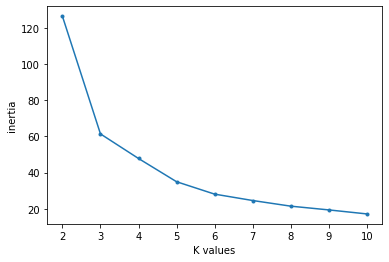

In [ ]:
# Visualize the Scores - Look for the elbow
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('K values')
plt.ylabel('inertia');

# plot indicates that 3 would be the ideal number of clusters. 
# Of course this is the mathmatical ideal... may differ from what experience or SMEs suggest.

### Python Example - Silhouette Score

In [ ]:
# from sklearn.metrics import silhouette_score

In [ ]:
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
# silhouette_scores = []

# for i in range(2,11):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(scaled_df)
#     # silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
#     silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

sil = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_df)
    sil.append(silhouette_score(scaled_df, kmeans.labels_))

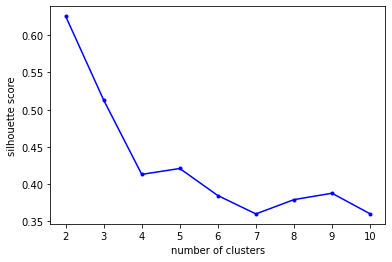

In [ ]:
plt.plot(range(2,11), sil, marker = '.', color = "Blue")
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');

# 2 appears to be the best based on the below graph

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.6256358724826118

In [ ]:
# Interestingly our Inertia/Elbow Test and Sil Score suggest different ideal cluster numbers.
# Lets make a scatter plot for both and see what we see with our eyeballs...

kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

In [ ]:
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


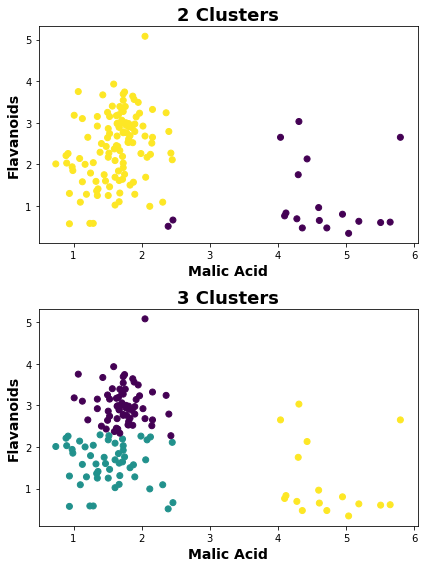

In [ ]:
fig, axes = plt.subplots(2,1, figsize = (6,8))
axes[0].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster2'])
axes[0].set_xlabel('Malic Acid', fontsize = 14, weight = 'semibold')
axes[0].set_ylabel('Flavanoids', fontsize = 14, weight = 'semibold')
axes[0].set_title('2 Clusters', fontsize = 18, weight = 'bold')
axes[1].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster3'])
axes[1].set_xlabel('Malic Acid', fontsize = 14, weight = 'semibold')
axes[1].set_ylabel('Flavanoids', fontsize = 14, weight = 'semibold')
axes[1].set_title('3 Clusters', fontsize = 18, weight = 'bold')
plt.tight_layout();

## Explanatory Analysis of Clusters
Unsupervised clustering algorithms group data points together based on some measure of similarity.  However, once those groups are determined, what do they mean?  How can we explain to our stakeholders what makes data inside a cluster similar to other data inside the cluster and different than data in other clusters?

### Python Example
In this example, a non-profit would like to target countries for charitable works and projects.  They would like us to target a group of countries that are most in need of these services.  They have asked us to cluster the nations using the data they have provided to identify a group of countries that they should focus on.  They would also like to know what kinds of issues they should address in those countries

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Country-data - Country-data.csv', index_col = 'country')
display(df.head())
print('\n')
df.info()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200




<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [ ]:
print('Number of Duplicated Rows', df.duplicated().sum())
print('Number of NAs', df.isna().sum().sum())

Number of Duplicated Rows 0
Number of NAs 0


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
scaler = StandardScaler()

scaled_x = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
scaled_x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [ ]:
ks = range(2,11)
inertias = []
sils = []

for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(scaled_x)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(scaled_x, km.labels_))

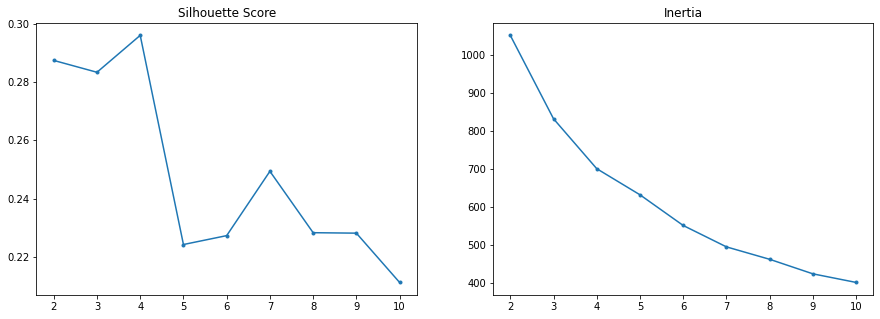

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
axes[0].plot(ks,sils, marker = '.')
axes[0].set_title('Silhouette Score')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias, marker = '.')
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

# Looks like 4 clusters is the ideal number based on the sil score

In [ ]:
# Find the mean values of the features for each group
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(scaled_x)

df['cluster'] = kmeans.labels_
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [ ]:
cluster_groups = df.groupby('cluster', as_index=False).mean() # as_index = False makes it so cluster isnt set as an index value.
cluster_groups

,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


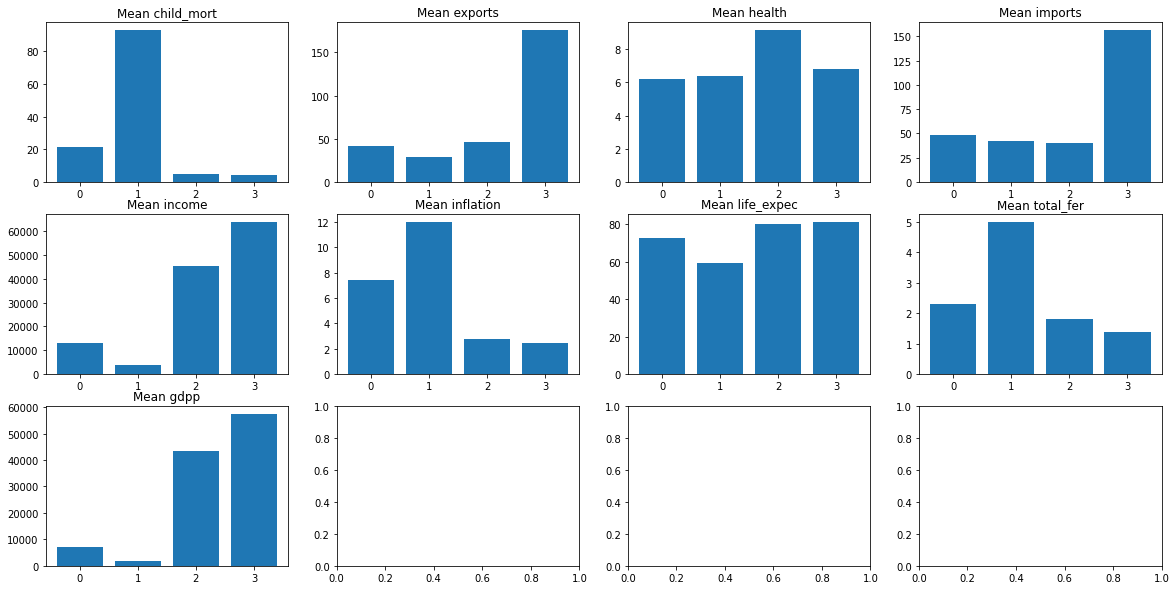

In [ ]:
fig, axes = plt.subplots(3,4, figsize = (20,10))
axes = axes.ravel() #use ravel to flatten the 3,4 array for ease of iterating.

for i, col in enumerate(cluster_groups.columns[1:]):
    axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
    axes[i].set_title(f'Mean {col}')

In [ ]:
# Countries in cluster 1 seem to be the most imporverished and most in need of aid...

df.loc[df['cluster'] == 1].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda',
       'Yemen', 'Zambia'],
      dtype='object', name='country')

# Hierarchical Clustering
Another way of clustering our data into groups... Two types of Hierarchical Clustering:
- Divisive Clustering: "Top Down Approach". Start with all the data points clustered together and work backwards until all the points are their own clusters.
- Agglomerative Clustering: "Bottom Up Approach". Start with all the data points in their own clusters and work up until everything is clustered together. 

In both of the above methods we have to decide the ideal stopping point or number of clusters. This can be visualized using a dendrogram. 

### Python Example - Dendrograms

In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# import scipy.cluster.hierarchy as sch

In [ ]:
# Load Data
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


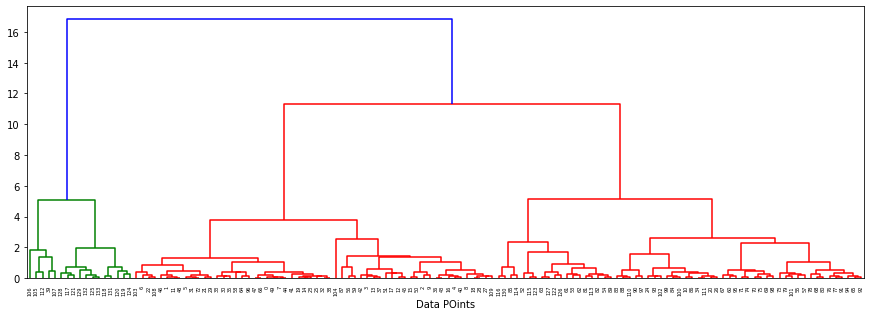

In [ ]:
plt.figure(figsize = (15,5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');

You generally want to find where the lines are the longest in the dendogram and draw a horizontal line across the diagram (here we would draw our horizontal line at 8 on the y axis). The number of vertical lines that your line intersects is the ideal number of clusters (3 in the above example). 

Python Example - Heirarchical Clustering

In [ ]:
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)

df['cluster'] = hc.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


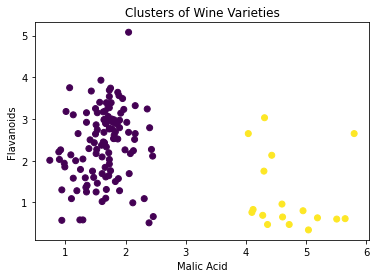

In [ ]:
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

In [ ]:
# trying again with 3 for comparison...

hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)

df['cluster'] = hc.labels_

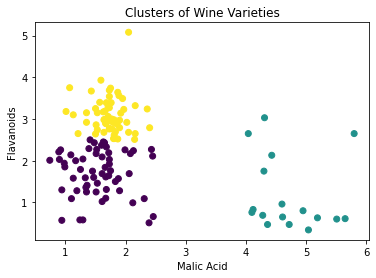

In [ ]:
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

# DBSCAN
Density Based Spatial Custering of Applicatiosn with Noise. Another clustering algorithm. Evaluates data based on density while eliminating noise... do not have to have a number of clusters in mind. Relies on the following two parameters:
- Epsilon (greek E symbol): Radius that the algorithm searches around a datapoint for possible other neighbors. 
- min samples: the minimum ammount of neighbors for them to be considered part of the cluster. 

The algorithm picks a random datapoint and works outward checking for points inside the radius of epsilon. If the number of new neighbors is equal to or greater than the minimum they are added. Repeat until the minimum threshold is not met. Then restart with a new datapoint.
- Nifty website: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

This algorithm works best on data where density is more explanatory for clusters than distance. See below for examples...

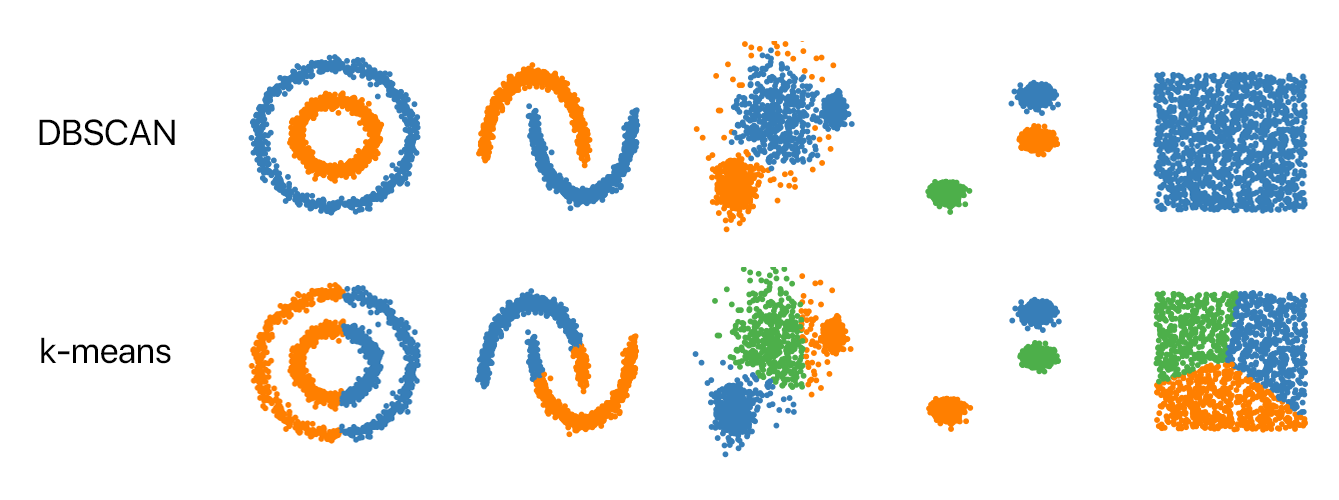

### Python Example - DBSCAN

In [ ]:
# from sklearn.cluster import DBSCAN

In [ ]:
# Prep data as above...
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
# Instantiate DBSCAN.
# Note that DBSCAN also fits the data during this step!!!
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)

df['cluster'] = dbs.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([ 0, -1,  1])

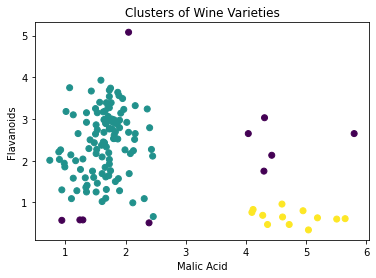

In [ ]:
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

# The purple in the below graph are the 'noise'